In [1]:
from matplotlib import pyplot as plt
import numpy as np

from synet.networks.random import random_two_split_network
from synet.networks import HeterogeneousNetwork
from synet.config import measures

In [2]:
np.random.seed(1872631)
n_events = 5000
max_dt = 200
n_agents = 100
heterogeniety_step = 0.002

In [3]:
%%time
all_hetero_vals = np.arange(0, 1+1e-7, heterogeniety_step)
networks = [HeterogeneousNetwork(n_agents=n_agents, n_events=n_events, heterogeniety=h)
            for h in all_hetero_vals]

CPU times: user 1min 22s, sys: 17.6 ms, total: 1min 22s
Wall time: 1min 22s


In [4]:
%%time

all_results = {}

for meas_name, measure_class in measures.items():
    meas = measure_class()
    entropies = meas.entropy_dt(networks, max_dt, n_jobs=32)
    all_results[meas_name] = np.array([np.mean(e) for e in entropies])

CPU times: user 787 ms, sys: 1.8 s, total: 2.59 s
Wall time: 1min 42s


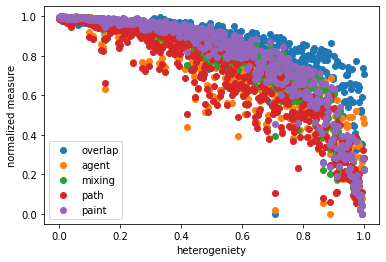

In [8]:
for method_name, results in all_results.items():
    res = results-results.min()
    res = res/res.max()
    plt.scatter(all_hetero_vals, res, label=method_name)
plt.xlabel("heterogeniety")
plt.ylabel("normalized measure")
plt.legend()
plt.show()

In [6]:
from scipy.stats import spearmanr
for method_name, results in all_results.items():
    print(method_name, spearmanr(all_hetero_vals, results))

overlap SpearmanrResult(correlation=-0.920686785790968, pvalue=4.983429041181976e-206)
agent SpearmanrResult(correlation=-0.9324619605410693, pvalue=8.708275980389675e-223)
mixing SpearmanrResult(correlation=-0.9743036953980486, pvalue=0.0)
path SpearmanrResult(correlation=-0.946700002385667, pvalue=1.1882317942497658e-247)
paint SpearmanrResult(correlation=-0.979625641147983, pvalue=0.0)
